# Springboard Relax Challenge
Defining an "adopted user" as a user who has logged into the product on three separate days in at least one sevenday period, identify which factors predict future user adoption.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
# read user engagements
takehome_user_engagement = pd.read_csv("takehome_user_engagement.csv", parse_dates=['time_stamp'])

There is a utf-8 decoding error while reading the second file

In [3]:
# check encoding
with open("takehome_users.csv") as f:
    print(f.encoding)

cp1252


In [4]:
# reread users with alternate encoding and prevent scientifc notation for last_session_creation_time
takehome_users = pd.read_csv("takehome_users.csv", parse_dates=['creation_time', 'last_session_creation_time'], encoding = "cp1252")

In [5]:
takehome_user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [6]:
takehome_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   object        
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 937.6+ KB


In [7]:
# Convert invited_by_user_id to int64 to match engagements
takehome_users['invited_by_user_id'] = takehome_users['invited_by_user_id'].fillna(0)
takehome_users.invited_by_user_id = takehome_users.invited_by_user_id.astype(int)

## Exploratory Data Analysis
takehome user engagement

In [8]:
print(takehome_user_engagement.time_stamp.min())
print(takehome_user_engagement.time_stamp.max())

2012-05-31 08:20:06
2014-06-06 14:58:50


In [9]:
takehome_user_engagement['date'] = takehome_user_engagement['time_stamp'].dt.date

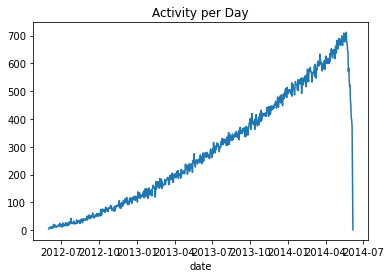

In [10]:
# Use trend by day
takehome_user_engagement.groupby(['date'])['user_id'].count().plot(title="Activity per Day")
# [takehome_user_engagement.date < takehome_user_engagement.date.max()]

In [11]:
# Maximum users
takehome_user_engagement.groupby(['date'])['user_id'].count().max()

712

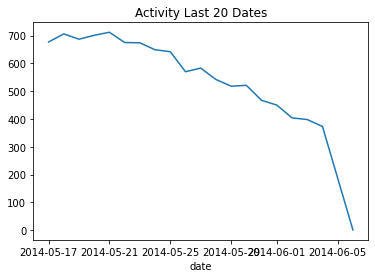

In [12]:
# Last 20 dates
takehome_user_engagement.groupby(['date'])['user_id'].count().tail(20).plot(title="Activity Last 20 Dates")

In [13]:
# Last day index
takehome_user_engagement[takehome_user_engagement['time_stamp'] >= '2014-06-06']

,time_stamp,user_id,visited,date
70763,2014-06-06 14:58:50,4051,1,2014-06-06


In [14]:
# Drop last day with one user
takehome_user_engagement.drop(takehome_user_engagement.index[70763], inplace=True)

In [15]:
# Count user visits
user_visit_count = takehome_user_engagement.groupby(['user_id'])['visited'].sum().to_frame()

In [16]:
user_visit_count.sort_values(by='visited')

,visited
user_id,
1,1
7318,1
7316,1
7315,1
7314,1
...,...
8068,585
7590,590
1811,593


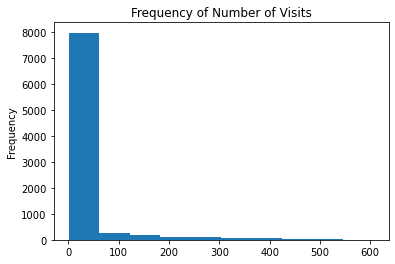

In [17]:
user_visit_count.visited.plot(kind="hist", bins=10, title="Frequency of Number of Visits")

In [18]:
user_visit_count[user_visit_count.visited <= 20].groupby(['visited'])['visited'].count()

visited
1     6234
2      340
3      241
4      181
5      110
6       85
7       68
8       57
9       48
10      34
11      26
12      29
13      29
14      30
15      13
16      20
17      18
18      18
19      12
20      16
Name: visited, dtype: int64

In [19]:
print("Pct of users who logged in once: "+"{:.1%}".format(6234/12000))

Pct of users who logged in once: 51.9%


In [20]:
print("Pct of users who never logged in: "+"{:.1%}".format(1-len(user_visit_count) / len(takehome_users)))

Pct of users who never logged in: 26.5%


In [21]:
print(user_visit_count.mean())
print(user_visit_count.median())

visited    23.567898
dtype: float64
visited    1.0
dtype: float64


In [22]:
takehome_users.groupby(['invited_by_user_id'])['invited_by_user_id'].count().sort_values()

invited_by_user_id
5885        1
6123        1
6110        1
6101        1
6083        1
         ... 
11770      11
1525       11
2527       12
10741      13
0        5583
Name: invited_by_user_id, Length: 2565, dtype: int64

In [23]:
print("Users invited: ", 12000-5583)
print("Pct users invited: "+"{:.1%}".format(1-5583/12000))

Users invited:  6417
Pct users invited: 53.5%


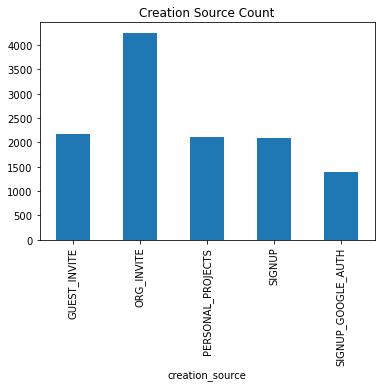

In [24]:
takehome_users.groupby(['creation_source'])['creation_source'].count().plot(kind="bar", title="Creation Source Count")

In [25]:
takehome_users.groupby(['org_id'])['org_id'].count().sort_values()

org_id
416      2
386      7
397      8
400      8
355      9
      ... 
4      159
3      168
2      201
1      233
0      319
Name: org_id, Length: 417, dtype: int64

In [26]:
print("Pct of records with last session time: "+"{:.1%}".format(takehome_users.last_session_creation_time.count() / len(takehome_users)))

Pct of records with last session time: 73.5%


In [27]:
takehome_users.opted_in_to_mailing_list.value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

In [28]:
takehome_users.enabled_for_marketing_drip.value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

## EDA Notes

- Almost 208,000 entries over two years of user activity, last day of 2012-05-31 through 2014-06-06
- Steady increase in user activity until end of sample period
- Maximum activity was 712 users on 2014-05-21 and declined to 373 users on 2014-06-04
- User activity ranged from a single use to 606 daily logins with a mean of 24 logins but a median of 1 login
- 52% of users logged in only once, and 26.5% never logged in at all
- There are 1,445 users out of 12,000 that can be described as an adopted user
- 6,417 users, or 53.5%, were invited to join from another user
- Org_Invite is the largest Creation_Source category, double the second tier group
- There are 417 Organization ID groups, the largest with 319 users and the smallest with only 2
- Last session time is populated for only 73.5% of users
- About 1/3rd of users opted in to the mailing list, and less than 1/5th are enabled for marketing drip
- There are 1,184 different email domain names, but only six major domains

## Define Adopted User
A user who has logged into the product on three separate days in at least one seven-day period

In [29]:
# Weekly visit counts by user
engagement_weekly = takehome_user_engagement.groupby([pd.Grouper(key='time_stamp', freq='W'), 'user_id']).visited.sum().to_frame()

In [30]:
engagement_weekly[engagement_weekly.visited >= 3]

visited
time_stamp user_id         
2012-06-10 1693           3
2012-06-17 728            4
           11764          3
2012-06-24 1693           3
           5297           3
...                     ...
2014-06-08 11573          3
           11688          3
           11806          3
           11895          3
           11924          3

[33859 rows x 1 columns]

In [31]:
engagement_weekly.reset_index(inplace=True)

In [32]:
engagement_weekly.user_id[engagement_weekly.visited >= 3].nunique()

1445

In [33]:
# Three or more visits within a week
adopted_users = engagement_weekly[engagement_weekly.visited >= 3].groupby(['user_id'])['visited'].sum().to_frame()

In [34]:
adopted_users['adopted'] = 1
adopted_users.head()

,visited,adopted
user_id,,
2,3,1
10,249,1
20,3,1
33,3,1
42,331,1


## Select Features

In [36]:
tu_copy = takehome_users.copy()
tu_copy.rename(columns = {'object_id':'user_id'}, inplace=True)
tu_copy.set_index(['user_id'], inplace=True)

In [37]:
# Binary column for invited_by_user_id
tu_copy['invited']= tu_copy['invited_by_user_id'].apply(lambda x: 0 if x == 0 else 1)

In [38]:
# Add visit count by user
tu_copy = tu_copy.join(user_visit_count)

In [39]:
# NaN to zero, float to int
tu_copy.last_session_creation_time = tu_copy.last_session_creation_time.fillna(0)
tu_copy.visited = tu_copy.visited.fillna(0)
tu_copy.visited = tu_copy.visited.astype(int)

In [40]:
# Add target - adopted
tu_copy = tu_copy.join(adopted_users.adopted)

In [41]:
tu_copy.adopted = tu_copy.adopted.fillna(0)
tu_copy.adopted = tu_copy.adopted.astype(int)

In [42]:
# Add email domain
tu_copy['domain'] = tu_copy['email'].apply(lambda x: x.split('@')[1])

In [43]:
tu_copy.domain.nunique()

1184

In [44]:
tu_copy.domain.value_counts().head(8)

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
mumdc.com            2
qgjbc.com            2
Name: domain, dtype: int64

In [45]:
# Identify top 6 email domains, plus 'other'
domain_list = ['gmail.com', 'yahoo.com', 'jourrapide.com', 'cuvox.de', 'gustr.com', 'hotmail.com']
tu_copy['domains'] = tu_copy['domain'].apply(lambda x: x if x in domain_list else 'other')

In [46]:
# Get dummies for email domain
tu_copy = pd.get_dummies(tu_copy, columns=['domains'])

# Get dummies for Creation Source
tu_copy = pd.get_dummies(tu_copy, columns=['creation_source'])

# Drop fields not used
tu_final = tu_copy.drop(['creation_time', 'name', 'email', 'last_session_creation_time', 'invited_by_user_id', 'domain'], axis=1)

tu_final.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited', 'visited', 'adopted', 'domains_cuvox.de',
       'domains_gmail.com', 'domains_gustr.com', 'domains_hotmail.com',
       'domains_jourrapide.com', 'domains_other', 'domains_yahoo.com',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

## Model
Logistic Regression for binary classification target: adopted

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Separate X, y, train, test, validate samples
y = tu_final.adopted
X = tu_final.drop(['adopted'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1, random_state=7)

# Steps, pipeline, scale, fit
steps = [('scaler', StandardScaler()), ('logreg', LogisticRegression(random_state = 7))]
pipeline = Pipeline(steps)
logreg_scaled = pipeline.fit(X_train, y_train)

In [49]:
# Accuracy on testing
print("The testing accuracy is "+"{:.1%}".format(logreg_scaled.score(X_test, y_test)))

The testing accuracy is 98.7%


In [50]:
# 5-fold cross-validation scores
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.98291667 0.98583333 0.98708333 0.98333333 0.97708333]
Average 5-Fold CV Score: 0.98325


The model does not appear to overfit due to the low variation in cross-validation.

In [51]:
features = list(X)

# Check coefficients
logreg = LogisticRegression(random_state = 7)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
logreg.fit(X_train,y_train)
std_coef = logreg.coef_.reshape(-1,1).tolist()
feature_names = [feature.title() for feature in features]
coef_df = pd.DataFrame(std_coef,index=feature_names,columns=['coef'])
coef_df['abs'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values(by='abs',ascending=False).drop('abs',axis=1)
pd.set_option('display.max_rows', None)
print(coef_df)

                                        coef
Creation_Source_Personal_Projects  -1.275431
Domains_Jourrapide.Com             -1.098972
Creation_Source_Signup_Google_Auth -1.093591
Invited                            -0.856672
Domains_Yahoo.Com                  -0.599938
Domains_Gustr.Com                  -0.529565
Domains_Cuvox.De                   -0.513479
Visited                             0.500337
Creation_Source_Signup             -0.465908
Creation_Source_Org_Invite         -0.454423
Domains_Gmail.Com                  -0.414916
Creation_Source_Guest_Invite       -0.402249
Domains_Hotmail.Com                -0.381373
Domains_Other                      -0.153358
Opted_In_To_Mailing_List            0.108395
Enabled_For_Marketing_Drip          0.086732
Org_Id                             -0.000351


C:\Users\opa\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy is 98.7% and the model uses some email domains and creation sources as top features.

Specifically, user accounts emailing from Jourrapide.com and created through Google_Auth or Personal Projects are most likely to become adopted users. Additional benefit comes if a new user was invited by an existing user.